## 2019 Predict Ideology of Banks from Tweets

In [1]:
from fastai.text.all import *
from rich import inspect

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
from ideology_utils import *

In [5]:
group = Path('/home/cdaniels/fastai-projects/blue-or-red/data_banks')
model = "blue-or-red-2019.pkl"
learn = load_learner(model)

In [ ]:
scores = {}
for g in group.ls().shuffle():
    try:
        handle, s1, s2, n = ideology_score(g, model)
        scores[handle] = [s1,s2,n]
        print([handle,s1,s2,n])
    except:
        continue

['bbva_usa', 0.48, 0.49, 1876]


['bnymellon', 0.41, 0.44, 1894]


['creditsuisse', 0.38, 0.44, 1366]


['comericabank', 0.23, 0.31, 1262]


['bmo', 0.39, 0.44, 1956]


['goldmansachs', 0.45, 0.47, 1801]


['bbt', 0.77, 0.66, 1934]


['firstrepublic', 0.41, 0.43, 1994]


['citizensbank', 0.29, 0.39, 1893]


['svb_financial', 0.33, 0.39, 1433]


['suntrust', 0.31, 0.39, 1686]


['bokfinancial', 0.48, 0.48, 529]


['morganstanley', 0.43, 0.45, 1925]


['jpmorgan', 0.42, 0.45, 1757]


['rbc', 0.38, 0.42, 1627]


['td_canada', 0.73, 0.61, 1962]


['wellsfargo', 0.52, 0.5, 1551]


['hsbc', 0.37, 0.41, 1726]


['keybank', 0.41, 0.43, 1198]


['zionsbank', 0.45, 0.49, 1686]


['askregions', 0.68, 0.56, 1912]


['usbank', 0.4, 0.44, 1819]


['firstcitizens', 0.35, 0.43, 708]


['capitalone', 0.35, 0.42, 1919]


['pncbank', 0.46, 0.47, 1874]


['citi', 0.24, 0.34, 1524]


['mandt_bank', 0.27, 0.32, 1936]


['huntington_bank', 0.4, 0.43, 1742]


['fifththird', 0.54, 0.51, 1950]


['northerntrust', 0.49, 0.51, 1435]


In [124]:
pd.to_pickle(scores,'scores_banks_2019.pkl')

In [129]:
scores = pd.read_pickle('scores_banks_2019.pkl')

**scores = {handle: [s1, s2, n], . . .}**, where, **s1** is the mean of the **Conservative** probability of each of the tweets and **s2** is the mean number of tweets scored **Conservative**. The range for each s1, s2 is **[0,1]** such that **0** is 100% **Progressive** and **1** is 100% **Conservative**. **n** is the number of tweets.

In [115]:
def scores2df(scores, sortby='s1'):
    "Assumes scores = {handle:[s1,s2,n]}"
    df = pd.DataFrame(scores).transpose()
    df.columns=['s1','s2','n']
    df.reset_index(inplace=True)
    df = df.rename(columns = {'index':'handle'})
    df = df.sort_values(by=[sortby])
    return df

### Ideology Score of Large Banks

In [130]:
df = scores2df(scores,'s1')

#### 0 is progressive, 1 is conservative

<AxesSubplot:ylabel='handle'>

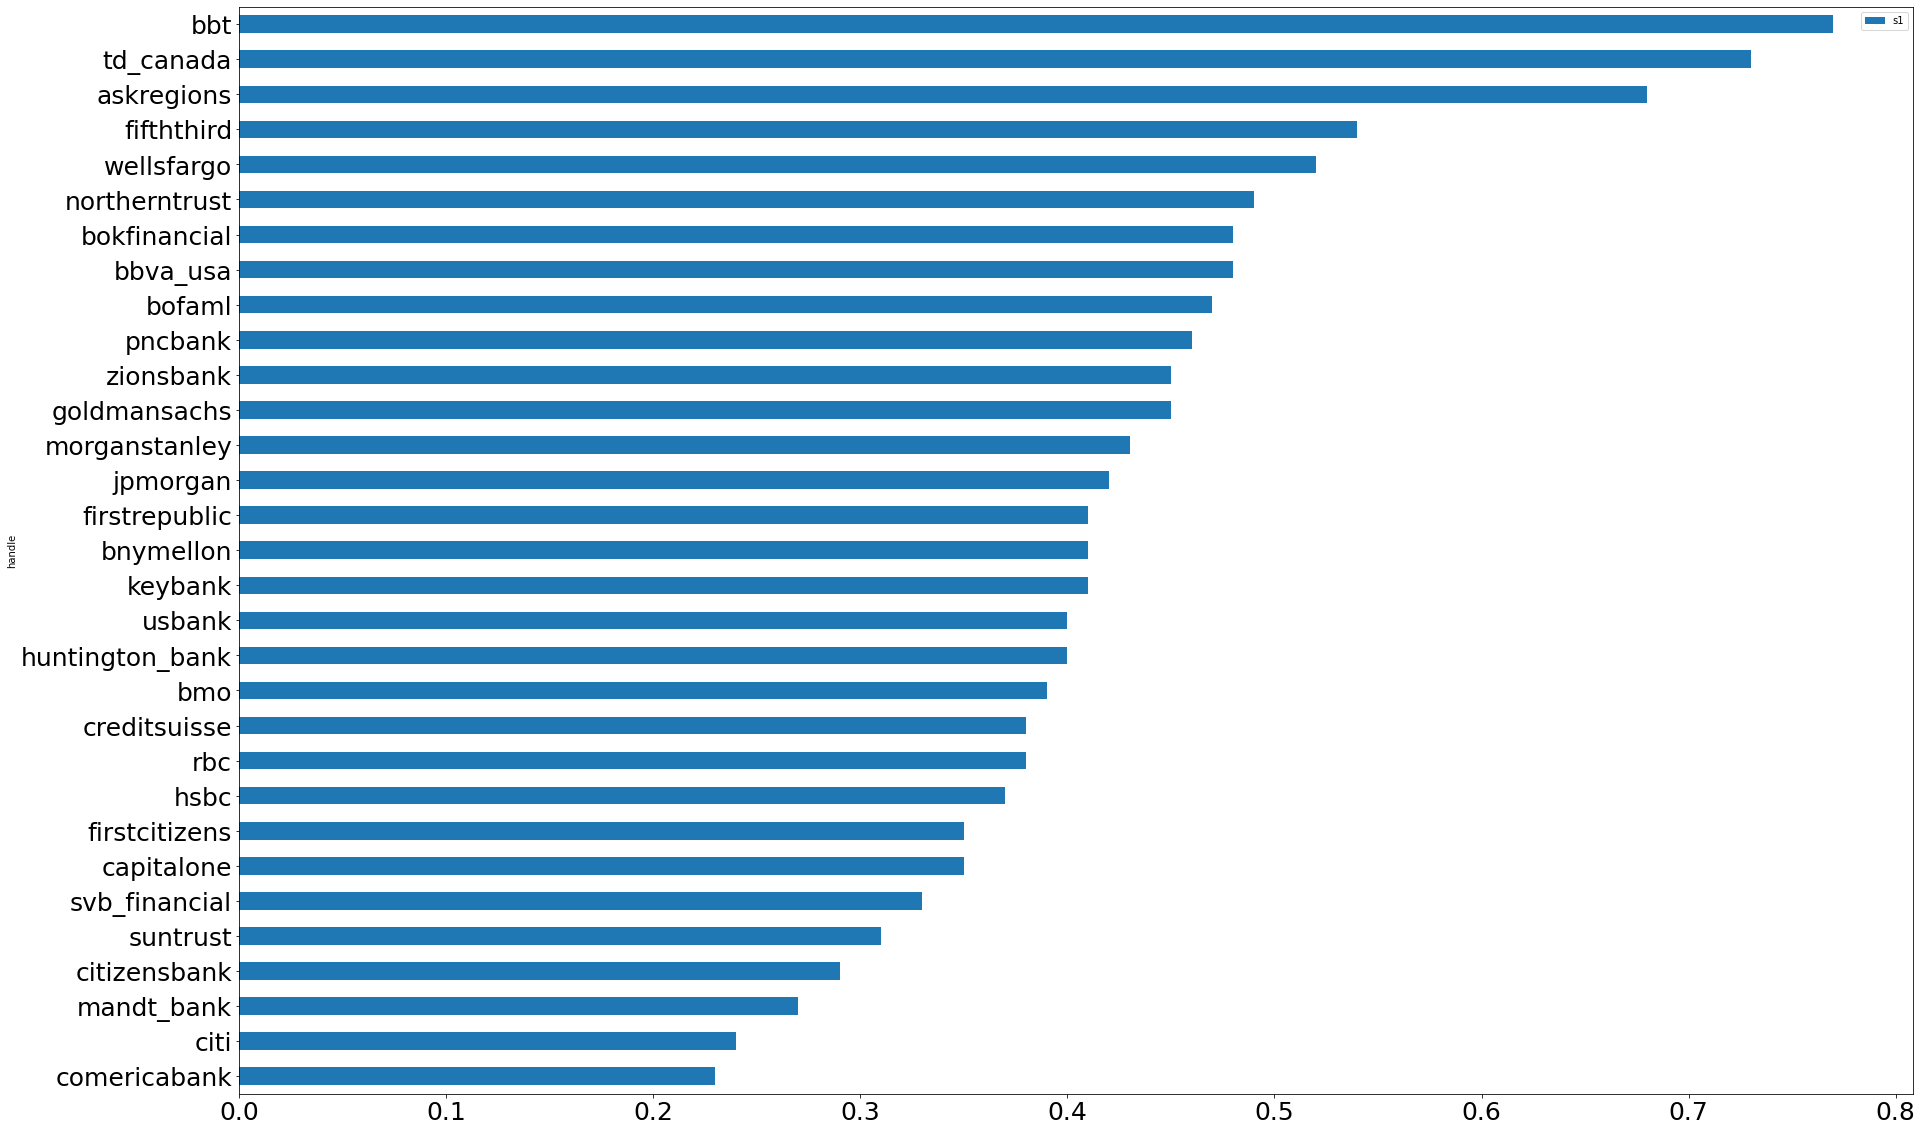

In [131]:
df.plot.barh(y='s1',x='handle',figsize=(30,20),fontsize=25)